# importing the libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load the file

In [69]:
df=pd.read_csv("C:/Users/Dell/Desktop/datasets/1000_Companies.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [70]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [71]:
df.size

5000

In [72]:
df.shape

(1000, 5)

In [73]:
df.duplicated().isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [74]:
df1=df.dropna()
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [75]:
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [76]:
X=df1.iloc[:,:-1].values
y=df1.iloc[:,4].values

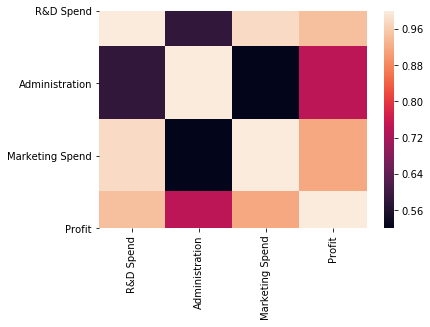

In [77]:
#Data visualization
#Building the correlation matrix
sns.heatmap(df1.corr())

In [78]:
# remove the warnings
import warnings
warnings.filterwarnings('ignore')
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
X[:,3]=le.fit_transform(X[:,3])


In [79]:
#Label encoder
X[0]

array([165349.2, 136897.8, 471784.1, 2], dtype=object)

In [80]:
#onehot encoder
#By using onehot encoder we apply the categorical columns only
oh=OneHotEncoder(categorical_features=[3])
X=oh.fit_transform(X).toarray()

In [81]:
X[0]

array([0.000000e+00, 0.000000e+00, 1.000000e+00, 1.653492e+05,
       1.368978e+05, 4.717841e+05])

In [82]:
#Avoiding the dummy variable trap 
#1st three columns are dummy columns so these dummy columns are removed
X=X[:,3:]
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       ...,
       [100275.47, 241926.31, 227142.82],
       [128456.23, 321652.14, 281692.32],
       [161181.72, 270939.86, 295442.17]])

In [83]:
#splliting the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [84]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(750, 3) (250, 3) (750,) (250,)


In [85]:
#fitting the training data into linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
#predicting the x_test data
y_pred=lr.predict(X_test)
y_pred

array([ 89190.67499275,  87828.24837017,  94290.55745529, 175890.39232027,
        83514.61204892, 110652.53759647, 131864.3300785 ,  90872.05856309,
       164633.43911143,  53532.65323126,  66368.95804148, 150796.53536364,
       126284.86067218,  58762.86226022, 176842.11882514,  75425.79378998,
       118504.71045207, 163913.21363057, 173108.79354901, 182091.19094822,
       121457.47388455,  85073.38589325, 181197.76835895,  83549.76594166,
       104393.43505293, 100624.2548291 ,  55142.57507276,  57006.02652609,
        68313.56692923, 210053.27059093, 121033.21637478, 111106.96558559,
       101575.98142444, 138199.44832124,  63391.16850898, 108242.35438566,
       186033.56808929, 171655.63776317, 174854.63940052, 117928.52998101,
        96823.35050304, 164790.34540587, 107109.71402755,  50506.84869823,
       116771.88217502,  58058.07016424, 158640.13405963,  78830.57406298,
       159950.25854026, 131383.88581041, 185082.69900943, 174819.48559825,
        93142.48372867,  

In [87]:
#calculating the coefficient
lr.coef_

array([0.5264497 , 0.90468902, 0.1022818 ])

In [88]:
#calculating the intercept
lr.intercept_

-57898.6257264794

In [89]:
#calculating mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred).mean()
print(mse)

161401199.34011114


In [90]:
#calculating the R squared error
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.921160768994541